### 1. Загрузка и подготовка данных 📥

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)
df = pd.read_csv('top_podcasts.csv')
df

,date,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,duration_ms,explicit,is_externally_hosted,is_playable,language,languages,release_date,release_date_precision,show.copyrights,show.explicit,show.href,show.html_description,show.is_externally_hosted,show.languages,show.media_type,show.total_episodes,show.type,show.uri
0,2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,9872105,True,False,True,en,['en'],2024-08-29,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
1,2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,11250345,True,False,True,en,['en'],2024-08-27,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2,2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,10840020,True,False,True,en,['en'],2024-08-28,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
3,2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,1073386,False,False,True,en,['en'],2024-08-31,day,[],False,https://api.spotify.com/v1/shows/0KvuZJgXfOGan...,"Your one stop shop for all things dinosaurs, p...",False,['en'],mixed,30,show,spotify:show:0KvuZJgXfOGanBRuq6B9dm
4,2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,8896992,False,False,True,en,['en'],2024-08-30,day,[],False,https://api.spotify.com/v1/shows/5L2ON33kXa2b7...,<p>The Tucker Carlson Show is your beacon of f...,False,['en'],audio,115,show,spotify:show:5L2ON33kXa2b7laBpCAgOI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228795,2024-10-24,196,us,NEW,4gN52Acdqwhm3yVKRx6rkQ,1LeIhhawEPWj4uVLQV8Lkd,"Ep. 1470 - Kamala's Desperate Final Plea: ""Vot...","Today on the Matt Walsh Show, Kamala's support...",The Matt Walsh Show,Fed up with the talking heads? Matt gives you ...,The Daily Wire,3433926,False,False,True,en,['en'],2024-10-23,day,[],False,https://api.spotify.com/v1/shows/1LeIhhawEPWj4...,Fed up with the talking heads? Matt gives you ...,False,['en'],audio,1760,show,spotify:show:1LeIhhawEPWj4uVLQV8Lkd
228796,2024-10-24,197,us,DOWN,0EKudi8llheMMGZtplDXeM,5RdShpOtxKO3ZWohR2M6Sv,The Haitian Zombie Potion,Long before they graced our screens as mindles...,Conspiracy Theories,"The world’s most controversial events, and the...",Spotify Studios,2797191,False,False,True,en,['en'],2024-10-16,day,[],False,https://api.spotify.com/v1/shows/5RdShpOtxKO3Z...,"<p>The world’s most controversial events, and ...",False,['en'],mixed,487,show,spotify:show:5RdShpOtxKO3ZWohR2M6Sv
228797,2024-10-24,198,us,DOWN,0yuHmGEuJJWV7crHH38AmA,5lY4b5PGOvMuOYOjOVEcb9,Menopause: The Myths and the Madness,Something is coming for 4 billion people on th...,Science Vs,"There are a lot of fads, blogs and strong opin...",Spotify Stu

In [2]:
# Выбираем только англоязычные подкасты
df_english = df[df['language'].apply(lambda x: 'en' in x)]

In [3]:
# Выбираем подкасты только с Америки
df_us = df_english[df_english['region'] == 'us']

In [4]:
df_us['language'].value_counts()

language
en       8275
en-US    1959
en-AU       5
Name: count, dtype: int64

In [5]:
# Удаляю все подкасты с австралийским английским
df_en = df_us[~df_us['language'].apply(lambda x: 'en-AU' in x)]
df_en = df_en.reset_index(drop=True)

In [6]:
df_en

,date,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,duration_ms,explicit,is_externally_hosted,is_playable,language,languages,release_date,release_date_precision,show.copyrights,show.explicit,show.href,show.html_description,show.is_externally_hosted,show.languages,show.media_type,show.total_episodes,show.type,show.uri
0,2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,9872105,True,False,True,en,['en'],2024-08-29,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
1,2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,11250345,True,False,True,en,['en'],2024-08-27,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2,2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,10840020,True,False,True,en,['en'],2024-08-28,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
3,2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,1073386,False,False,True,en,['en'],2024-08-31,day,[],False,https://api.spotify.com/v1/shows/0KvuZJgXfOGan...,"Your one stop shop for all things dinosaurs, p...",False,['en'],mixed,30,show,spotify:show:0KvuZJgXfOGanBRuq6B9dm
4,2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,8896992,False,False,True,en,['en'],2024-08-30,day,[],False,https://api.spotify.com/v1/shows/5L2ON33kXa2b7...,<p>The Tucker Carlson Show is your beacon of f...,False,['en'],audio,115,show,spotify:show:5L2ON33kXa2b7laBpCAgOI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,2024-10-24,196,us,NEW,4gN52Acdqwhm3yVKRx6rkQ,1LeIhhawEPWj4uVLQV8Lkd,"Ep. 1470 - Kamala's Desperate Final Plea: ""Vot...","Today on the Matt Walsh Show, Kamala's support...",The Matt Walsh Show,Fed up with the talking heads? Matt gives you ...,The Daily Wire,3433926,False,False,True,en,['en'],2024-10-23,day,[],False,https://api.spotify.com/v1/shows/1LeIhhawEPWj4...,Fed up with the talking heads? Matt gives you ...,False,['en'],audio,1760,show,spotify:show:1LeIhhawEPWj4uVLQV8Lkd
10230,2024-10-24,197,us,DOWN,0EKudi8llheMMGZtplDXeM,5RdShpOtxKO3ZWohR2M6Sv,The Haitian Zombie Potion,Long before they graced our screens as mindles...,Conspiracy Theories,"The world’s most controversial events, and the...",Spotify Studios,2797191,False,False,True,en,['en'],2024-10-16,day,[],False,https://api.spotify.com/v1/shows/5RdShpOtxKO3Z...,"<p>The world’s most controversial events, and ...",False,['en'],mixed,487,show,spotify:show:5RdShpOtxKO3ZWohR2M6Sv
10231,2024-10-24,198,us,DOWN,0yuHmGEuJJWV7crHH38AmA,5lY4b5PGOvMuOYOjOVEcb9,Menopause: The Myths and the Madness,Something is coming for 4 billion people on th...,Science Vs,"There are a lot of fads, blogs and strong opin...",Spotify Studio

In [7]:
df_en.columns

Index(['date', 'rank', 'region', 'chartRankMove', 'episodeUri', 'showUri',
       'episodeName', 'description', 'show.name', 'show.description',
       'show.publisher', 'duration_ms', 'explicit', 'is_externally_hosted',
       'is_playable', 'language', 'languages', 'release_date',
       'release_date_precision', 'show.copyrights', 'show.explicit',
       'show.href', 'show.html_description', 'show.is_externally_hosted',
       'show.languages', 'show.media_type', 'show.total_episodes', 'show.type',
       'show.uri'],
      dtype='object')

In [8]:
df_en = df_en[['rank', 'episodeName', 'description', 'show.name', 'show.publisher', 'duration_ms', 'explicit', 'show.total_episodes']]

In [9]:
df_en

,rank,episodeName,description,show.name,show.publisher,duration_ms,explicit,show.total_episodes
0,1,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,Joe Rogan,9872105,True,2366
1,2,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,Joe Rogan,11250345,True,2366
2,3,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,Joe Rogan,10840020,True,2366
3,4,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,ExtinctZoo,1073386,False,30
4,5,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,Tucker Carlson Network,8896992,False,115
...,...,...,...,...,...,...,...,...
10229,196,"Ep. 1470 - Kamala's Desperate Final Plea: ""Vot...","Today on the Matt Walsh Show, Kamala's support...",The Matt Walsh Show,The Daily Wire,3433926,False,1760
10230,197,The Haitian Zombie Potion,Long before they graced our screens as mindles...,Conspiracy Theories,Spotify Studios,2797191,False,487
10231,198,Menopause: The Myths and the Madness,Something is coming for 4 billion people on th...,Science Vs,Spotify Studios,2484741,False,274
10232,199,Start Strong: Do This Every Morning to Get Out...,"If you have trouble getting out of bed, there ...",The Mel Robbins Podcast,Mel Robbins,2952986,False,228


In [10]:
df_en = df_en.drop_duplicates(subset='episodeName', keep='last')
df_en = df_en.reset_index(drop=True)

In [11]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 3624 non-null   int64 
 1   episodeName          3624 non-null   object
 2   description          3623 non-null   object
 3   show.name            3624 non-null   object
 4   show.publisher       3624 non-null   object
 5   duration_ms          3624 non-null   int64 
 6   explicit             3624 non-null   bool  
 7   show.total_episodes  3624 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 201.9+ KB


In [12]:
df_en.isnull().sum()

rank                   0
episodeName            0
description            1
show.name              0
show.publisher         0
duration_ms            0
explicit               0
show.total_episodes    0
dtype: int64

In [13]:
df_en.describe()

,rank,duration_ms,show.total_episodes
count,3624.000000,3.624000e+03,3624.000000
mean,138.048565,3.813113e+06,769.304084
std,47.895407,2.603452e+06,766.365620
min,1.000000,1.995700e+04,1.000000
25%,108.000000,1.790432e+06,200.000000
50%,149.000000,3.420552e+06,500.000000
75%,178.000000,4.943914e+06,1190.000000
max,200.000000,1.989385e+07,3629.000000


In [14]:
import warnings
warnings.filterwarnings('ignore')

# Преобразуем длительность из миллисекунд в минуты
df_en['duration_min'] = df_en['duration_ms'] / 60000

df_en.drop('duration_ms', axis=1, inplace=True)
df_en['duration_min'] = df_en['duration_min'].round(2)

In [15]:
import re
import pandas as pd

def clean_description(text):
    if pd.isnull(text):
        return ""
    text = str(text)

    patterns_to_remove = [
        r'http\S+|www\S+|https\S+', 
        r'(?i)(promo code|use code|discount|sponsor|ad choices|subscribe|offer code)',  
        r'(?i)(learn more|visit|shop now|watch|further reading|further listening)',   
        r'(?i)(thank you for listening|check out our)',  
    ]

    start_idx = len(text)
    for pattern in patterns_to_remove:
        match = re.search(pattern, text)
        if match:
            start_idx = min(start_idx, match.start())

    clean_text = text[:start_idx].strip()

    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    clean_text = clean_text.replace("\xa0", " ")

    return clean_text

# Приводим колонку 'description' к нижнему регистру и применяем функцию очистки
df_en['clean_description'] = df_en['description'].str.lower().apply(clean_description)

In [16]:
df_en

,rank,episodeName,description,show.name,show.publisher,explicit,show.total_episodes,duration_min,clean_description
0,57,Inside America’s Largest Open-Air Drug Market ...,Note: This video is for educational purposes. ...,Peter Santenello,Peter Santenello,False,28,74.40,note: this video is for educational purposes. ...
1,79,Why he went in space without a rope,An untethered flight seems like a risk. But ma...,Phil Edwards,Phil Edwards,False,7,15.44,an untethered flight seems like a risk. but ma...
2,91,MURDERED: Kent Leppink,Kent Leppink was murdered in 1996 near Hope Al...,Crime Junkie,audiochuck,False,401,49.70,kent leppink was murdered in 1996 near hope al...
3,96,Sam Richardson,"Sam Richardson (Sausage Party: Foodtopia, Veep...",Armchair Expert with Dax Shepard,Armchair Umbrella,True,768,117.55,"sam richardson (sausage party: foodtopia, veep..."
4,97,"PDB Situation Report | August 31, 2024: Ukrain...",In this episode of The PDB Situation Report U...,The President's Daily Brief,The First TV,False,734,61.20,in this episode of the pdb situation report uk...
...,...,...,...,...,...,...,...,...,...
3619,196,"Ep. 1470 - Kamala's Desperate Final Plea: ""Vot...","Today on the Matt Walsh Show, Kamala's support...",The Matt Walsh Show,The Daily Wire,False,1760,57.23,"today on the matt walsh show, kamala's support..."
3620,197,The Haitian Zombie Potion,Long before they graced our screens as mindles...,Conspiracy Theories,Spotify Studios,False,487,46.62,long before they graced our screens as mindles...
3621,198,Menopause: The Myths and the Madness,Something is coming for 4 billion people on th...,Science Vs,Spotify Studios,False,274,41.41,something is coming for 4 billion people on th...
3622,199,Start Strong: Do This Every Morning to Get Out...,"If you have trouble getting out of bed, there ...",The Mel Robbins Podcast,Mel Robbins,False,228,49.22,"if you have trouble getting out of bed, there ..."


##### Здесь я сравнивал колонки после очистки лишных символов и можно увидеть что наша функция смогла очистить лишных символов

In [17]:
df_en.loc[3000, 'description']

"Chris Distefano joins the pod to discuss finding out he’s German, the wisdom of old people, an insane request from a newfound relative, holding it in on stage, his dad’s ballsy gambling, why gambling was safer through the mob, and much more. Chris and Stav help callers including an expecting father wondering if it’s time to hang up his Muay Thai dreams, and a man who’s salty because one of his bros ghosted him after he got divorced.  Over 2 Million Butts Love TUSHY. Get 10% off TUSHY with the code STAVVY at https://hellotushy.com/STAVVY  Grow your business right now at Shopify -- no matter what stage you're in. Sign up for a\xa0 $1/month trial at https://www.shopify.com/stavvy\xa0   Get the shaving products that always deliver from Harry’s. Get started with a $13 trial set for just $3 at https://www.harrys.com/STAVVY  Discover personalized ED treatment options at Hims. Start your free online visit at https://www.hims.com/stavvy   LET'S START A CULT (starring and co-written by Stavvy) 

In [18]:
df_en.loc[3000, 'clean_description']

'chris distefano joins the pod to discuss finding out he’s german, the wisdom of old people, an insane request from a newfound relative, holding it in on stage, his dad’s ballsy gambling, why gambling was safer through the mob, and much more. chris and stav help callers including an expecting father wondering if it’s time to hang up his muay thai dreams, and a man who’s salty because one of his bros ghosted him after he got divorced. over 2 million butts love tushy. get 10% off tushy with the code stavvy at'

In [19]:
# Теперь удаляем колонку description так как мы очистили ее и создали другую колонку
df_en.drop('description', axis=1, inplace=True)

In [20]:
df_en.to_csv('data_for_podcasts.csv', index=False)

### Бейздайн модели

In [21]:
# Модель на основе rank
def recommend_by_rank(df, top_n=20):
    # Сортируем по rank по убыванию
    ranked_df = df.sort_values(by='rank', ascending=False)
    # Рекомендуем топ-N подкастов
    return ranked_df[['episodeName', 'show.name', 'rank']].head(top_n)


# Получаем рекомендации
top_rank_recommendations = recommend_by_rank(df_en)

# Выводим результаты
print("Top 20 by Rank:")
top_rank_recommendations

Top 20 by Rank:


,episodeName,show.name,rank
3623,Monday Morning Podcast 10-21-24,Monday Morning Podcast,200
818,"Cat-Eating, Rally Sizes, and Post-Birth Aborti...",Honestly with Bari Weiss,200
3196,Indian Posse: The Native Teen Gang Ruling Cana...,The Underworld Podcast,200
2896,"10/14/24: Panic As Kamala Falls In Polls, Obam...",Breaking Points with Krystal and Saagar,200
2816,UAP Greatest Hits: Is the Government Controlli...,UAP Unidentified Alien Podcast,200
1125,Kourtney Kardashian Barker Gets Real About Bou...,The Skinny Confidential Him & Her Podcast,200
2500,"#240 - UFO Physical Evidence, Aliens & The Vat...",Julian Dorey Podcast,200
331,S21 E13: (1/4) [Annie + Lauren + Rachael] Deny...,Something Was Wrong,200
1968,THE GREATEST GAME EVER PLAYED: FULL WEEK 5 RECAP,Unnecessary Roughness,200
3046,Detroit Drug Kingpin Reveals Becoming BIGGEST ...,The Connect- with Johnny Mitchell,200


In [22]:
# Модель на основе total_episodes
def recommend_by_total_episodes(df, top_n=20):
    # Сортируем по total_episodes по убыванию
    episodes_df = df.sort_values(by='show.total_episodes', ascending=False)
    # Рекомендуем топ-N подкастов
    return episodes_df[['episodeName', 'show.name', 'show.total_episodes']].head(top_n)

# Получаем рекомендации
top_episodes_recommendations = recommend_by_total_episodes(df_en)

# Выводим результаты
print("\nTop 20 by Total Episodes:")
top_episodes_recommendations


Top 20 by Total Episodes:


,episodeName,show.name,show.total_episodes
3603,Propaganda Wars: Exposing the Globalist Coordi...,The Glenn Beck Program,3629
3397,McDonald's-Gate: Media LOSE IT Over Viral Trum...,The Glenn Beck Program,3627
3184,Hamas Leader's Bodyguard Worked for UN Agency?...,The Glenn Beck Program,3621
3135,The Real Reason Kamala Harris Did the Fox News...,The Glenn Beck Program,3621
3113,Kamala's DESPERATE (and Racist?) Pander to Bla...,The Glenn Beck Program,3620
3035,EXCLUSIVE: Trump Opens Up on Threats to His Li...,The Glenn Beck Program,3618
2953,How the Left Could DISQUALIFY Trump if He Wins...,The Glenn Beck Program,3616
2692,Ron DeSantis Gives FEMA a Master Class in Disa...,The Glenn Beck Program,3610
2727,"Surgeon General Warns Parenting Is Harmful, So...",The Glenn Beck Program,3610
2636,Why Kamala's New Media Blitz Is a GIFT to the ...,The Glenn Beck Program,3609


### Обучение модели Doc2Vec на данных


In [33]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Предобработка текста
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    return filtered

# Подготовка данных для Doc2Vec
tagged_data = [
    TaggedDocument(words=preprocess_text(desc), tags=[str(i)])
    for i, desc in enumerate(df_en['clean_description'])
]

# Обучение модели Doc2Vec с улучшенными параметрами
model = Doc2Vec(
    vector_size=150,
    window=5,
    min_count=2,
    workers=4,
    epochs=40,
    dm=1,
    hs=0,
    negative=10
)

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Сохраняем модель
model.save("podcast_doc2vec.model")

# Функция для получения вектора подкаста
def get_podcast_vector(episode_description):
    return model.infer_vector(preprocess_text(episode_description))

# Функция для получения индекса по названию эпизода
def get_podcast_index_by_name(episode_name):
    return df_en[df_en['episodeName'] == episode_name].index[0]

# Рекомендательная функция
def recommend_similar_podcasts_by_name(episode_name, top_n=20):
    podcast_index = get_podcast_index_by_name(episode_name)
    target_vector = get_podcast_vector(df_en['clean_description'][podcast_index])

    # Вычисление всех векторов заранее (можно сохранить в файл для ускорения)
    all_vectors = np.array([get_podcast_vector(desc) for desc in df_en['clean_description']])

    similarity_scores = cosine_similarity([target_vector], all_vectors)[0]
    similar_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]  # -1 исключает сам подкаст

    results = df_en.iloc[similar_indices][['episodeName', 'show.name', 'show.publisher', 'show.total_episodes']].copy()
    results['model_index'] = similar_indices
    results['model_score'] = similarity_scores[similar_indices].round(2)

    return results.reset_index(drop=True)

# Пример использования
episode_name = 'Sam Richardson'
similar_podcasts = recommend_similar_podcasts_by_name(episode_name, top_n=5)

# Вывод результата
similar_podcasts

[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     Cyborg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     Cyborg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,episodeName,show.name,show.publisher,show.total_episodes,model_index,model_score
0,From Navy SEAL To Viral Content Creator - MrBa...,My First Million,Hubspot Media,678,2530,0.51
1,#94 - Sarah Tollemache and Joe List,Stavvy's World,Stavros Halkias,190,1181,0.51
2,"10/14/24: Kamala Falling In Polls, Obama Scold...",Breaking Points with Krystal and Saagar,iHeartPodcasts,889,2909,0.51
3,#95 - Kyle Dunnigan,Stavvy's World,Stavros Halkias,191,1627,0.51
4,Ryan Salame: Facing Prison for Donating to Tru...,The Tucker Carlson Show,Tucker Carlson Network,139,2980,0.51


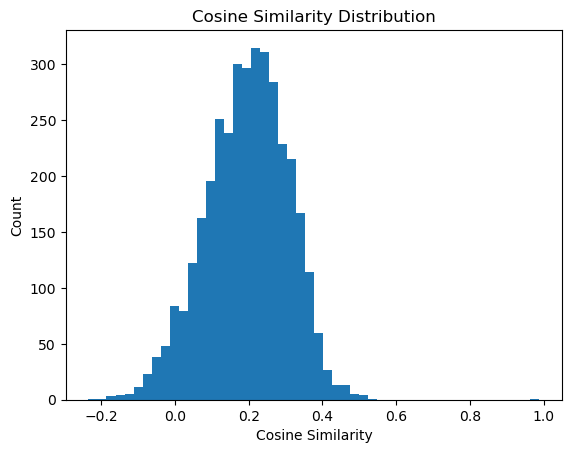

In [29]:
import matplotlib.pyplot as plt

target_vector = get_podcast_vector(df_en['clean_description'][0])
all_vectors = np.array([get_podcast_vector(desc) for desc in df_en['clean_description']])
similarity_scores = cosine_similarity([target_vector], all_vectors)[0]

plt.hist(similarity_scores, bins=50)
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.show()